In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
#from customplot import *

In [3]:
# Create your connection.
cnx = sqlite3.connect('D:/Data_Science/Datasets/database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [4]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [5]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


In [7]:
df.isnull().any().any(), df.shape

(True, (183978, 42))

In [8]:
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [9]:
df.isnull().any()

id                     False
player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating          True
potential               True
preferred_foot          True
attacking_work_rate     True
defensive_work_rate     True
crossing                True
finishing               True
heading_accuracy        True
short_passing           True
volleys                 True
dribbling               True
curve                   True
free_kick_accuracy      True
long_passing            True
ball_control            True
acceleration            True
sprint_speed            True
agility                 True
reactions               True
balance                 True
shot_power              True
jumping                 True
stamina                 True
strength                True
long_shots              True
aggression              True
interceptions           True
positioning             True
vision                  True
penalties               True
marking       

In [10]:
rows = df.shape[0]

df = df.dropna()

In [11]:
df.isnull().any().any(), df.shape

(False, (180354, 42))

In [12]:
rows - df.shape[0]

3624

In [13]:
df = df.reindex(np.random.permutation(df.index))

In [14]:
df.head(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
135493,135494,204612,255963,2014-09-18 00:00:00,64.0,73.0,left,medium,medium,52.0,...,60.0,50.0,53.0,53.0,47.0,11.0,12.0,7.0,11.0,9.0
49220,49221,172854,26004,2009-08-30 00:00:00,63.0,74.0,right,high,medium,50.0,...,64.0,63.0,60.0,65.0,68.0,7.0,8.0,5.0,14.0,9.0
27287,27288,105866,39419,2014-10-31 00:00:00,74.0,74.0,right,medium,medium,34.0,...,33.0,40.0,77.0,77.0,75.0,8.0,9.0,9.0,6.0,13.0
145053,145054,141092,43208,2013-09-20 00:00:00,69.0,69.0,right,low,medium,71.0,...,52.0,57.0,69.0,73.0,69.0,10.0,8.0,6.0,11.0,5.0
164095,164096,189476,273564,2016-01-21 00:00:00,68.0,68.0,left,medium,medium,33.0,...,45.0,35.0,71.0,68.0,64.0,15.0,6.0,10.0,8.0,8.0


In [23]:
df[['overall_rating', 'penalties']]

,overall_rating,penalties
104366,80.0,64.0
77818,67.0,44.0
31897,59.0,52.0
89569,68.0,50.0
101098,71.0,30.0
...,...,...
54538,74.0,66.0
209,72.0,73.0
163124,63.0,53.0
113539,81.0,71.0


In [24]:
potentialFeatures = ['acceleration', 'curve', 'free_kick_accuracy', 'ball_control', 'shot_power', 'stamina']

In [28]:
for f in potentialFeatures:
    related = df['overall_rating'].corr(df[f])
    print("%s: %f" % (f, related))

acceleration: 0.243998
curve: 0.357566
free_kick_accuracy: 0.349800
ball_control: 0.443991
shot_power: 0.428053
stamina: 0.325606


In [29]:
cols = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [46]:
correlations = [df['overall_rating'].corr(df[f]) for f in cols]

In [47]:
len(cols), len(correlations)

(34, 34)

In [48]:
def plot_frame(df, ylabel):
    color = 'coral'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(ylabel)
    
    ax = df2.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df2.index)
    ax.set_xticklabels(df2.attributes, rotation=75);#Notice the ; (remove it and see what happens !)
    plt.show()

In [49]:
df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations})

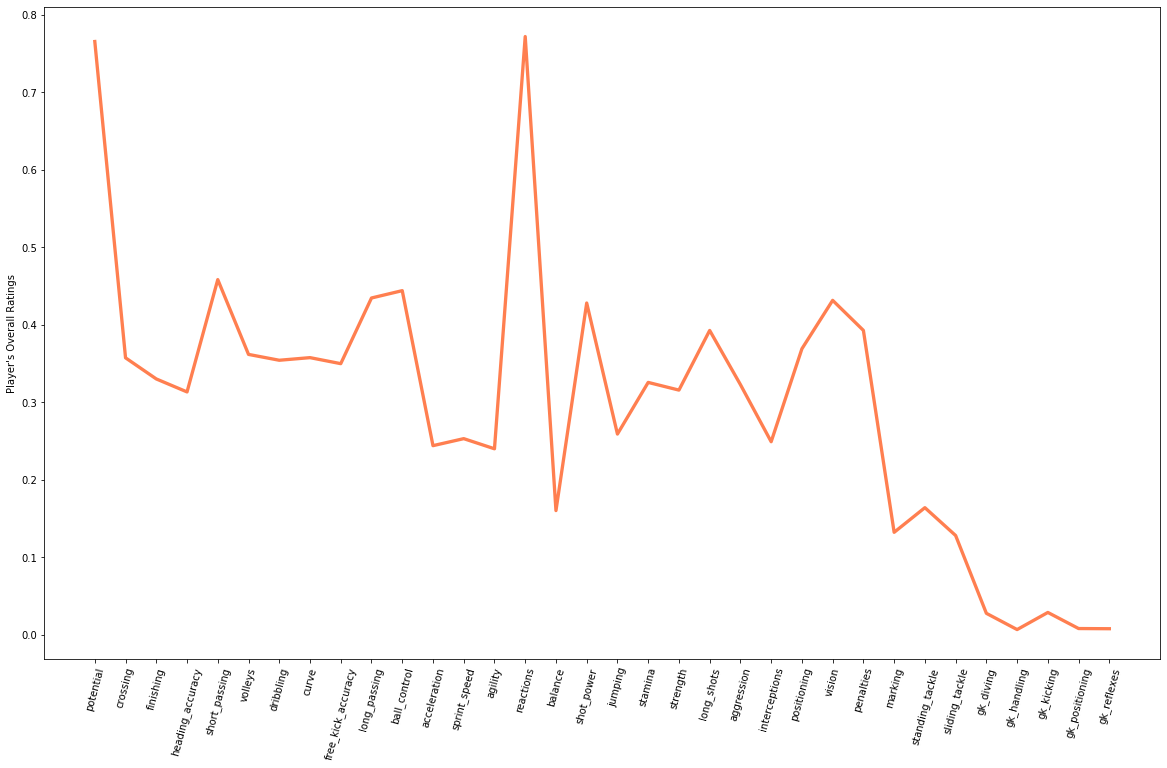

In [50]:
plot_frame(df2, 'Player\'s Overall Ratings')

In [51]:
select5features = ['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']
select5features

['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']

In [52]:
dfselect = df[select5features].copy(deep=True)

In [53]:
dfselect.head()

,gk_kicking,potential,marking,interceptions,standing_tackle
104366,7.0,80.0,68.0,82.0,81.0
77818,10.0,73.0,63.0,64.0,65.0
31897,10.0,68.0,56.0,58.0,58.0
89569,13.0,77.0,59.0,64.0,71.0
101098,7.0,71.0,70.0,68.0,74.0


In [55]:
data = scale(dfselect)
noOfClusters = 4
model = KMeans(init = 'k-means++', n_clusters = noOfClusters, n_init = 20).fit(data)

In [56]:
print(90*'_')
print("\nCount of players in each cluster")
print(90*'_')

pd.value_counts(model.labels_, sort=False)

__________________________________________________________________________________________

Count of players in each cluster
__________________________________________________________________________________________


0    49964
1    55849
2    50749
3    23792
dtype: int64

In [57]:
P = pd_centers(featuresUsed=select5features, centers=model.cluster_centers_)
P

NameError: name 'pd_centers' is not defined